In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [37]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.59', '1.3.1')

In [0]:
torch.cuda.set_device(0)

In [0]:
sp_model = 'data/bn_spm.model'
class BengaliTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(sp_model)
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [43]:

BengaliTokenizer

__main__.BengaliTokenizer

In [0]:
# %cd ..
sp = spm.SentencePieceProcessor()
sp.Load(sp_model)
itos = [sp.IdToPiece(int(i)) for i in range(50000)]

In [0]:
bengali_vocab = Vocab(itos)

In [0]:

tokenizer = Tokenizer(tok_func=BengaliTokenizer, lang='bn')

In [47]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [48]:
data_path = 'data'
data_lm = TextLMDataBunch.from_folder(path=data_path, tokenizer=tokenizer, vocab=bengali_vocab)

In [49]:
data_lm.batch_size

64

In [0]:

data_lm.save()

In [51]:
data_lm.show_batch()

idx,text
0,"▁আছে । ▁ডলারের ▁সঙ্গে ▁টাকার ▁বিনিময় ▁হার ▁প্রতিনিয়ত ▁বাড়ছে । ▁এটি ▁চলতে ▁থাকলে ▁আগামী ▁অর্থ বছর ▁থেকে ▁বাংলাদেশ ▁পেট্রোলিয়াম ▁করপোরেশন ▁( বি পিসি ) ▁আবার ▁লোকসান ের ▁সম্মুখীন ▁হতে ▁পারে । ▁বাস্তবতার ▁কারণে ▁আন্তর্জাতিক ▁বাজারে ▁তেলের ▁দাম ▁কম া - বাড় ার ▁সঙ্গে ▁সঙ্গে ▁দেশের ▁অভ্যন্তরে ▁জ্বালানি ▁তেলের ▁বাড়ানো - কম ানো ▁করা ▁সম্ভব ▁হয় ▁না । ▁তিনি ▁বলেন , ▁এর ▁আগে ▁ভর্তুকি ▁মূল্যে ▁জ্বালানি ▁তেল ▁বিক্রি ▁করায় ▁২৭ ,"
1,"▁গত ▁বছর ▁এ ▁সময়ে ▁পেঁয়াজ ের ▁কেজি ▁ছিল ▁২০ ▁থেকে ▁৪০ ▁টাকা । ▁কার ওয়ান ▁বাজারে ▁পাল্লা ▁হিসেবে ▁( ৫ ▁কেজি ) ▁পেঁয়াজ ▁বিক্রি ▁করছিলেন ▁পাইকারি ▁বিক্রেতা রা । ▁স্বদেশ ি ▁বাণিজ্য ালয় ের ▁বিক্রেতা ▁মো . ▁ইয়াসিন ▁বললেন , ▁দেশি ▁পেঁয়াজ ের ▁সরবরাহ ▁কম । ▁নতুন ▁পেঁয়াজ ▁এখনো ▁বাজারে ▁পুরোপুরি ▁আসতে ▁শুরু ▁করেনি । ▁আগামী ▁সপ্তাহে ▁নতুন ▁পেঁয়াজ ▁বাজারে ▁এলে ▁দাম ▁কমতে ▁পারে । ▁x x bo s ▁গত"
2,"▁কু তু পাল ং ▁শিবিরের ▁রোহিঙ্গা ▁মোহাম্মদ ▁ইসমাইল ▁( ৫৫ ) ▁বলেন , ▁‘ প্র ত্যা বাসন ▁শুরু ▁হোক , ▁তা ▁আমরা ▁সবাই ▁চাই । ▁কিন্তু ▁শর্ত ▁আছে । ▁প্রত্যা বাসন ের ▁আগে ▁রোহিঙ্গাদের ▁“ নাগরিক ” ▁হিসেবে ▁ঘোষণা ▁দিতে ▁হবে ▁মিয়ানমার কে । ▁তারপর ▁রাখাইন ে ▁শান্তিপূর্ণভাবে ▁বসবাসের ▁নিরাপত্তা ▁দিতে ▁হবে । ▁তবে ই ▁রোহিঙ্গা রা ▁ফিরে ▁যেতে ▁সিদ্ধান্ত ▁নেবে । ’ ▁বালুখালী ▁শিবিরের ▁রোহিঙ্গা ▁সলিম া ▁খাতুন ▁("
3,▁কিছু ▁বলার ▁নেই । মক র <unk> pri cor n ▁২২ ▁ডিসেম্বর — ২০ ▁জানুয়ারি । ▁ভর ▁ <unk> ▁৩ ▁ <unk> ▁আপনার ▁সপ্তাহ ▁যাবে ▁ধনু র ▁মতো । ▁নিজের ▁ওপর ▁আস্থা ▁রাখুন । কুম্ভ <unk> ▁a qua ri us ▁২১ ▁জানুয়ারি — ১৮ ▁ফেব্রুয়ারি । ▁ভর ▁ <unk> ▁৯ ▁ <unk> ▁কুম্ভ ▁রাশির ▁নেতৃত্ব গুণ ▁এ ▁সপ্তাহে ▁শীর্ষে ▁থাকবে । ▁সপ্তাহ ▁হবে ▁শুভ । মী ন <unk> s ces
4,"▁হাজার ▁টাকার ▁জ্ঞাত ▁আয় বহির্ভূত ▁সম্পদ ▁অর্জন ▁করেছেন । ▁তাঁকে ▁অবৈধ ▁অর্থ ▁অর্জনে ▁সহায়তা ▁করেছেন ▁ওয়ান্ডারার্স ▁ক্লাবের ▁কর্মচারী ▁আবুল ▁কালাম ▁ও ▁এনামুল ের ▁বন্ধু ▁হিসেবে ▁পরিচিত ▁হারুন ▁অর ▁রশিদ । ▁তাই ▁এই ▁তিনজনকে ▁একটি ▁মামলায় ▁আসামি ▁করা ▁হয়েছে । ▁অন্যদিকে , ▁এনামুল ের ▁ভাই ▁রূপ ন ▁ভূঁইয়া র ▁বিরুদ্ধে ▁মামলাটি ▁করেছেন ▁দু দক ের ▁আরেক ▁সহকারী ▁পরিচালক ▁মোহাম্মদ ▁নেয়া মুল ▁আহসান ▁গাজী । ▁মামলার ▁এ জা হারে ▁বলা ▁হয় ,"


In [52]:
len(data_lm.vocab.itos)

50000

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [54]:
gc.collect()

0

In [55]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


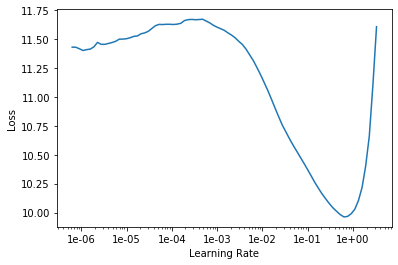

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.275065,3.967267,0.407943,32:34


In [0]:
learn.save('first', with_opt=True)

In [59]:
learn.load('first', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (80000 items)
x: LMTextList
▁x x bo s ▁আপাতত ▁জ্বালানি ▁তেলের ▁দাম ▁কমানোর ▁কোনো ▁পরিকল্পনা ▁সরকারের ▁নেই । আজ ▁রোববার ▁জাতীয় ▁সংসদে ▁স্পিকার ▁শিরীন ▁শারমিন ▁চৌধুরীর ▁সভাপতিত্বে ▁অনুষ্ঠিত ▁অধিবেশনে ▁লিখিত ▁প্রশ্নের ▁উত্তরে ▁বিদ্যুৎ , ▁জ্বালানি ▁ও ▁খনিজ ▁সম্পদ ▁মন্ত্রণালয়ের ▁প্রতিমন্ত্রী ▁নস রুল ▁হামিদ ▁এ ▁কথা ▁জানিয়েছেন । সাংস দ ▁রুস্তম ▁আলী ▁ফর া জীর ▁প্রশ্নের ▁উত্তরে ▁প্রতিমন্ত্রী ▁বলেন , ▁আন্তর্জাতিক ▁বাজারে ▁জ্বালানি ▁তেলের ▁মূল্য ▁গত ▁এক ▁বছর ▁ধরে ▁ঊর্ধ্বমুখী ▁রয়েছে । ▁এখন ▁তা ▁অব্যাহত ▁আছে । ▁ডলারের ▁সঙ্গে ▁টাকার ▁বিনিময় ▁হার ▁প্রতিনিয়ত ▁বাড়ছে । ▁এটি ▁চলতে ▁থাকলে ▁আগামী ▁অর্থ বছর ▁থেকে ▁বাংলাদেশ ▁পেট্রোলিয়াম ▁করপোরেশন ▁( বি পিসি ) ▁আবার ▁লোকসান ের ▁সম্মুখীন ▁হতে ▁পারে । ▁বাস্তবতার ▁কারণে ▁আন্তর্জাতিক ▁বাজারে ▁তেলের ▁দাম ▁কম া - বাড় ার ▁সঙ্গে ▁সঙ্গে ▁দেশের ▁অভ্যন্তরে ▁জ্বালানি ▁তেলের ▁বাড়ানো - কম ানো ▁করা ▁সম্ভব ▁হয় ▁না । ▁তিনি ▁বলেন , ▁এর ▁আগে ▁ভর্তুকি ▁মূল্যে ▁জ্বালানি ▁তেল ▁বিক্রি ▁করায় ▁২৭ , ৪ ১৯ . ৮১ ▁কোটি ▁ট

In [0]:
learn.unfreeze()

In [61]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.592755,3.799092,0.411617,37:13
1,3.519763,3.609101,0.437972,37:14
2,3.403304,3.417150,0.453712,37:23
3,3.206540,3.210001,0.473592,37:13
4,3.171268,3.126742,0.482679,37:15


In [0]:

learn.save('second_bn_lm', with_opt=True)

In [63]:
learn.load('second_bn_lm', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (80000 items)
x: LMTextList
▁x x bo s ▁আপাতত ▁জ্বালানি ▁তেলের ▁দাম ▁কমানোর ▁কোনো ▁পরিকল্পনা ▁সরকারের ▁নেই । আজ ▁রোববার ▁জাতীয় ▁সংসদে ▁স্পিকার ▁শিরীন ▁শারমিন ▁চৌধুরীর ▁সভাপতিত্বে ▁অনুষ্ঠিত ▁অধিবেশনে ▁লিখিত ▁প্রশ্নের ▁উত্তরে ▁বিদ্যুৎ , ▁জ্বালানি ▁ও ▁খনিজ ▁সম্পদ ▁মন্ত্রণালয়ের ▁প্রতিমন্ত্রী ▁নস রুল ▁হামিদ ▁এ ▁কথা ▁জানিয়েছেন । সাংস দ ▁রুস্তম ▁আলী ▁ফর া জীর ▁প্রশ্নের ▁উত্তরে ▁প্রতিমন্ত্রী ▁বলেন , ▁আন্তর্জাতিক ▁বাজারে ▁জ্বালানি ▁তেলের ▁মূল্য ▁গত ▁এক ▁বছর ▁ধরে ▁ঊর্ধ্বমুখী ▁রয়েছে । ▁এখন ▁তা ▁অব্যাহত ▁আছে । ▁ডলারের ▁সঙ্গে ▁টাকার ▁বিনিময় ▁হার ▁প্রতিনিয়ত ▁বাড়ছে । ▁এটি ▁চলতে ▁থাকলে ▁আগামী ▁অর্থ বছর ▁থেকে ▁বাংলাদেশ ▁পেট্রোলিয়াম ▁করপোরেশন ▁( বি পিসি ) ▁আবার ▁লোকসান ের ▁সম্মুখীন ▁হতে ▁পারে । ▁বাস্তবতার ▁কারণে ▁আন্তর্জাতিক ▁বাজারে ▁তেলের ▁দাম ▁কম া - বাড় ার ▁সঙ্গে ▁সঙ্গে ▁দেশের ▁অভ্যন্তরে ▁জ্বালানি ▁তেলের ▁বাড়ানো - কম ানো ▁করা ▁সম্ভব ▁হয় ▁না । ▁তিনি ▁বলেন , ▁এর ▁আগে ▁ভর্তুকি ▁মূল্যে ▁জ্বালানি ▁তেল ▁বিক্রি ▁করায় ▁২৭ , ৪ ১৯ . ৮১ ▁কোটি ▁ট

In [0]:
TEXT = "বাংলাদেশের জনসংখ্যা"
N_WORDS = 40
N_SENTENCES = 2

In [67]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

বাংলাদেশের জনসংখ্যা ▁বৃদ্ধি ▁আর ▁দারিদ্র্য সীমা র ▁কাছাকাছি ▁যাওয়া — এই ▁দুটি ▁ফর্মুলা র ▁মধ্যে ▁প্রকৃত ▁ভিন্নতা ▁হলো : ▁কৃষি , ▁বন্যা , ▁আবহাওয়া ▁এবং ▁ভবন ▁ও ▁চান্দ্র ▁মূল্যবান ▁জনগোষ্ঠীর ▁সঠিক ▁তথ্য বণ্টন ের ▁ধরন । ▁এই ▁সাফল্যের ▁জন্য ▁বাংলাদেশ ▁ও ▁ভারতের
বাংলাদেশের জনসংখ্যা ▁( খুলনা র ▁তুলনায় ) ▁বেশি । ▁এই ▁জনসংখ্যার ▁ঘনত্ব ▁প্রতিনিয়ত ▁বেড়ে ▁আসছে । ▁জলবায়ু ▁পরিবর্তনের ▁প্রভাবে ▁বিভিন্ন ▁দেশে ▁প্রতিবছর ▁গড়ে ▁যা ▁আসে ▁তা ▁থেকে ▁বিশ্বের ▁অনেক ▁মানুষের ▁ক্ষতির ▁পরিমাণ ▁অত্যন্ত ▁কম । ▁বাংলাদেশে ▁এখনো ▁দেশের ▁মানুষের ▁সংখ্যা ▁প্রায় ▁১০


In [68]:
np.exp(3.126742	)

22.799577384019802

In [0]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [0]:

defaults.device = torch.device('cpu')

In [71]:
learn = load_learner('data')

In [0]:
encoder = get_model(learn.model)[0]

In [73]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([50000, 400])

In [0]:
embeddings = encoder.state_dict()['encoder.weight']

In [0]:
embeddings = np.array(embeddings)

In [76]:
embeddings[0].shape

(400,)

In [0]:
df = pd.DataFrame(embeddings)

In [78]:
df.shape

(50000, 400)

In [0]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1.014378,-0.507453,0.395279,0.057478,0.187083,0.151484,-0.322145,-0.468775,-0.392709,0.305681,0.262662,-0.355277,0.282639,0.479449,-0.862380,0.744077,-0.111243,-1.324518,0.237140,-0.510347,-0.257558,-0.181946,-0.735701,-0.554290,0.040073,0.698730,-1.161777,-0.470544,1.114990,0.428326,0.014344,0.404210,-0.622198,0.491159,0.026169,-0.909837,2.114542,-0.311683,0.108476,0.436549,...,0.736650,-0.140620,0.954127,0.232911,-0.781569,-0.041301,1.222618,-0.283340,-0.971192,-0.119232,0.862086,0.050156,-0.114696,0.572889,0.159810,0.181163,-0.405324,0.540570,-0.172956,-0.348418,0.474907,-0.527146,0.544209,-0.377350,0.126200,-0.515970,-0.475962,0.096846,0.394905,0.357438,-0.243540,0.258253,-0.178341,-0.446201,0.800499,0.227824,-0.083175,-0.352019,-0.537328,-0.029060
1,0.469901,-0.219806,-0.007079,0.448914,0.173913,-0.125158,0.026754,0.051514,0.136319,0.262012,0.127538,0.011627,0.123177,0.051878,-0.187716,0.173332,0.172667,-0.327061,0.070403,-0.111842,-0.164161,-0.098249,-0.237714,-0.030646,0.025436,0.200114,-0.215285,-0.043759,0.375760,0.125831,0.158534,0.175372,-0.481860,0.048837,0.007732,0.159285,0.297544,-0.137214,0.006798,-0.048566,...,0.214550,-0.010087,0.232930,-0.019566,-0.008371,0.221142,0.122264,0.028108,-0.216420,-0.034685,0.291394,-0.000891,-0.001637,-0.133768,0.336851,-0.016954,0.053621,0.184326,0.084466,-0.066331,0.128876,-0.234284,0.156464,-0.054325,-0.095193,-0.071329,0.126469,0.035335,0.010332,0.116241,-0.091729,-0.108195,-0.116373,0.038390,0.092561,-0.119637,0.133725,-0.012509,-0.477228,0.052850
2,0.469901,-0.219806,-0.007079,0.448914,0.173913,-0.125158,0.026754,0.051514,0.136319,0.262012,0.127538,0.011627,0.123177,0.051878,-0.187716,0.173332,0.172667,-0.327061,0.070403,-0.111842,-0.164161,-0.098249,-0.237714,-0.030646,0.025436,0.200114,-0.215285,-0.043759,0.375760,0.125831,0.158534,0.175372,-0.481860,0.048837,0.007732,0.159285,0.297544,-0.137214,0.006798,-0.048566,...,0.214550,-0.010087,0.232930,-0.019566,-0.008371,0.221142,0.122264,0.028108,-0.216420,-0.034685,0.291394,-0.000891,-0.001637,-0.133768,0.336851,-0.016954,0.053621,0.184326,0.084466,-0.066331,0.128876,-0.234284,0.156464,-0.054325,-0.095193,-0.071329,0.126469,0.035335,0.010332,0.116241,-0.091729,-0.108195,-0.116373,0.038390,0.092561,-0.119637,0.133725,-0.012509,-0.477228,0.052850
3,1.861862,-0.654910,0.261645,0.717122,0.215609,-0.360684,-0.115596,-0.076315,0.012634,0.061086,0.121066,-0.363770,0.143725,-0.009009,-0.269333,1.496473,0.550652,-0.417332,0.214547,0.088529,-0.474625,-0.062520,-0.774604,-0.233924,0.436217,2.452878,1.210213,-0.265678,1.255978,0.159433,0.346400,0.256510,-1.656438,0.596166,0.309547,1.339893,1.844547,-0.089905,0.061896,0.093205,...,0.329608,0.109318,1.028433,0.209521,-0.743214,0.317065,0.379643,-0.096799,-1.600119,0.047858,1.247476,0.980024,-0.520426,-0.418726,0.543958,-0.350941,0.418167,0.306608,-0.220776,-0.331641,0.497137,-0.584229,0.220362,-0.002014,0.468821,-0.724761,0.222613,1.402152,-0.579945,0.655243,-0.113628,-0.059380,-0.153452,0.078067,0.316454,-1.859572,0.128270,-0.089352,-2.561541,0.170493
4,1.870750,-0.599145,0.257935,0.828712,0.145457,-0.272346,0.065212,0.124561,0.037593,0.016963,0.201799,-0.470576,0.142576,0.141377,-0.477282,0.381181,0.120405,-0.703023,0.370686,-1.000035,-0.420745,-0.170262,-0.685786,-0.049560,0.517997,2.833848,1.431267,-0.094443,1.041656,0.072067,0.229172,0.309794,-1.498972,0.557201,0.074249,0.692591,0.900898,0.014105,0.350228,-0.125941,...,0.346469,0.066126,0.765608,0.644958,-0.711468,0.258240,0.238020,-0.046673,-1.292278,-0.104758,0.600844,0.889335,0.208281,-0.449420,0.386101,-0.017267,-0.135566,0.420677,0.366939,-0.721652,0.496224,-0.555748,0.041471,0.011285,0.601236,-0.551510,0.314125,0.549186,-0.559994,0.577900,-0.109572,-0.360896

In [0]:
df2 = pd.DataFrame(itos)

In [82]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,।
4,","


In [83]:
df2.shape

(50000, 1)

In [0]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [85]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 4.6990e-01, -2.1981e-01, -7.0786e-03,  4.4891e-01,  1.7391e-01,
        -1.2516e-01,  2.6754e-02,  5.1514e-02,  1.3632e-01,  2.6201e-01,
         1.2754e-01,  1.1627e-02,  1.2318e-01,  5.1878e-02, -1.8772e-01,
         1.7333e-01,  1.7267e-01, -3.2706e-01,  7.0403e-02, -1.1184e-01,
        -1.6416e-01, -9.8249e-02, -2.3771e-01, -3.0646e-02,  2.5436e-02,
         2.0011e-01, -2.1528e-01, -4.3759e-02,  3.7576e-01,  1.2583e-01,
         1.5853e-01,  1.7537e-01, -4.8186e-01,  4.8837e-02,  7.7318e-03,
         1.5929e-01,  2.9754e-01, -1.3721e-01,  6.7977e-03, -4.8566e-02,
         2.2879e-01, -1.5346e-01,  1.9191e-01, -5.0307e-02,  8.1554e-02,
        -2.3975e-01, -2.3956e-01, -5.0619e-02, -1.6020e-01,  1.0710e-01,
        -1.0424e+00, -2.2455e-01,  9.1276e-02,  2.2228e-01,  1.7610e-02,
         1.2087e-01, -6.4047e-02, -1.7409e-01,  1.6576e-02, -1.0298e-01,
         2.0923e-02, -1.9639e-01,  6.0843e-02,  9.3367e-02, -2.3108e-02,
        -4.2743e-02, -3.3057e-02, -1.2727e-02,  7.4